In [2]:
%matplotlib widget
import os
import sys

sys.path.insert(0, os.getenv("HOME") + "/pycode/MscThesis/")
from amftrack.pipeline.functions.post_processing.extract_study_zone import *
import pandas as pd
import ast
from amftrack.plotutil import plot_t_tp1
from scipy import sparse
from datetime import datetime
import pickle
import scipy.io as sio
from pymatreader import read_mat
from matplotlib import colors
import cv2
import imageio
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import frangi
from skimage import filters
from random import choice
import scipy.sparse
import os
from skimage.feature import hessian_matrix_det
from amftrack.pipeline.paths.directory import (
    run_parallel,
    find_state,
    directory_scratch,
    directory_project,
)
from amftrack.notebooks.analysis.util import *
from scipy import stats
from scipy.ndimage.filters import uniform_filter1d
from collections import Counter
from IPython.display import clear_output
from amftrack.notebooks.analysis.data_info import *
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
plt.rcParams.update(
    {"font.family": "verdana", "font.weight": "normal", "font.size": 20}
)
from amftrack.plotutil import plot_node_skel
from amftrack.notebooks.validation.util import *
from amftrack.pipeline.paths.directory import *
from amftrack.util.sys import *
import pickle
from amftrack.pipeline.functions.post_processing.extract_study_zone import (
    load_study_zone,
)
from amftrack.pipeline.functions.post_processing.time_hypha import *
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
    save_graphs,
    load_graphs,
    load_skel,
)
from amftrack.pipeline.functions.image_processing.experiment_class_surf import Edge
from amftrack.pipeline.functions.post_processing.area_hulls import *

from shapely.geometry import Polygon, shape, Point
from scipy import spatial
import geopandas as gpd

/home/cbisot/pycode/MscThesis/amftrack/transfer/functions/transfer.py:1: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
directory = directory_project
# update_analysis_info(directory)
analysis_info = get_analysis_info(directory)

In [3]:
select = analysis_info
num = 2
rows = [row for (index, row) in select.iterrows()]
for index, row in enumerate(rows):
    path = f'{directory}{row["folder_analysis"]}'
    print(index, row["Plate"])
    try:
        a = np.load(f"{path}/center.npy")
    except:
        print(index, row["Plate"])
    if index == num:
        path_exp = f'{directory}{row["path_exp"]}'
        exp = pickle.load(open(path_exp, "rb"))
        exp.dates.sort()
        break

0 799
1 790
2 792


In [4]:
ts = range(exp.ts)
incr = 100
regular_hulls, indexes = get_regular_hulls_area_fixed(exp, ts, incr)

In [6]:
load_study_zone(exp)
exp.labeled = True
load_graphs(exp, indexes=[0])

In [1]:
API = str(np.load(os.getenv("HOME") + "/pycode/API_drop.npy"))
dir_drop = "data_tables"
root = os.getenv("TEMP")
path_save = f"{root}time_plate_infos.pick"
download(API, f"/{dir_drop}/time_plate_infos.pick", path_save)
time_plate_info = pd.read_pickle(path_save)
path_save = f"{root}global_hypha_info.pick"
download(API, f"/{dir_drop}/global_hypha_info.pick", path_save)
global_hypha_info = pd.read_pickle(path_save)
path_save = f"{root}time_hypha_info.pick"
download(API, f"/{dir_drop}/time_hypha_info.pick", path_save)
time_hypha_info = pd.read_pickle(path_save)

NameError: name 'np' is not defined

In [16]:
for ind, row in table.iterrows():
    Node(row["hypha"], exp).ts()[0]

0

0

0

0

0

0

0

0

0

0

0

0

0

0

0

0

0

0

0

0

0

0

0

0

0

0

1

1

1

1

1

1

1

1

1

1

1

1

2

2

2

4

5

7

8

9

10

11

13

13

13

13

14

14

14

14

14

14

14

14

15

15

15

16

16

16

16

16

16

16

16

16

16

17

17

17

17

17

17

17

17

17

18

18

18

18

18

18

18

18

18

18

18

19

19

19

19

19

19

19

19

19

19

19

19

19

19

19

19

19

19

19

19

19

19

20

20

20

20

20

20

20

21

21

21

21

21

21

21

21

21

21

21

21

21

21

21

21

21

21

21

21

22

22

22

22

22

22

22

22

22

22

22

22

22

22

22

22

22

22

22

23

23

23

23

23

23

23

23

23

23

23

23

23

23

23

24

24

24

24

24

24

24

24

24

24

24

24

24

24

24

24

24

24

24

24

24

24

24

24

24

24

24

25

25

25

25

25

25

25

25

25

25

25

25

25

25

25

25

25

25

25

25

25

25

25

25

25

25

26

26

26

26

26

26

26

26

26

26

26

26

26

26

26

26

26

26

26

26

26

26

26

26

26

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

27

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

28

29

29

29

29

29

29

29

29

29

29

29

29

29

29

29

29

29

29

29

29

29

29

29

29

29

29

29

29

29

29

29

29

29

29

29

29

29

29

29

29

29

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

30

31

31

31

31

31

31

31

31

31

31

31

31

31

31

31

31

31

31

31

31

31

31

31

31

31

31

31

31

31

31

31

32

32

32

32

32

32

32

32

32

32

32

32

32

32

32

32

32

32

32

32

32

32

32

32

32

32

32

32

32

32

32

32

32

32

32

32

32

32

32

32

32

32

32

32

32

32

32

32

32

32

32

32

33

33

33

33

33

33

33

33

33

33

33

33

33

33

33

33

33

33

33

33

33

33

33

33

33

33

33

33

33

33

33

33

33

33

33

33

33

33

33

33

33

33

33

33

33

33

33

33

33

34

34

34

34

34

34

34

34

34

34

34

34

34

34

34

34

34

34

34

34

34

34

34

34

34

34

34

34

34

34

34

34

34

34

34

34

34

34

34

34

34

34

34

34

35

35

35

35

35

35

35

35

35

35

35

35

35

35

35

35

35

35

35

35

35

35

35

35

35

35

35

35

35

35

35

35

35

35

35

35

35

35

35

35

35

35

35

35

35

35

35

35

35

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

36

37

37

37

37

37

37

37

37

37

37

37

37

37

37

37

37

37

37

KeyboardInterrupt: 

In [ ]:
table = global_hypha_info.loc[
    global_hypha_info["Plate"] == exp.folders["Plate"].unique()[0]
].copy()
table_time = time_hypha_info.loc[
    time_hypha_info["Plate"] == exp.folders["Plate"].unique()[0]
]
table_time_plate = time_plate_info.loc[
    time_plate_info["Plate"] == exp.folders["Plate"].unique()[0]
].copy()
table_time_plate = table_time_plate.set_index("t")
table["timestep_init"] = table.apply(
    lambda row: Node(row["hypha"], exp).ts().pop()
    if Node(row["hypha"], exp).ts()
    else None,
    axis=1,
)
rhos = []
ns = []
ans_rate = []
stop_rate = []
branch_rate = []
with tqdm(total=len(regular_hulls), desc="analysed") as pbar:
    for index in range(1, len(regular_hulls)):
        for t in range(exp.ts):
            hull1 = regular_hulls[index]
            hull2 = regular_hulls[index + 1]
            area = ring_area(hull1, hull2)
            column = f"ring_density_incr-100_index-{index}"
            rho = table_time_plate[column][t]
            rhos.append(rho)
            nodes = [
                node
                for node in exp.nodes
                if node.is_in(t)
                and np.any(hull2.contains(Point(node.pos(t))))
                and not np.any(hull1.contains(Point(node.pos(t))))
                and np.all(is_in_study_zone(node, t, 1000, 200))
            ]
            tips = [node.label for node in nodes if node.degree(t) == 1]
            table["max_speed"] = table_time.groupby("end")["speed"].max()
            growing_tips = table_time.loc[
                (table_time["end"].isin(tips)) & (table_time["timestep"] == t)
            ]
            growing_tips = growing_tips.loc[growing_tips["speed"].between(40, 350)]
            if len(growing_tips) > 0:
                timedelta = growing_tips["timedelta"].unique()[0]
                consistent_tips = growing_tips.loc[
                    growing_tips["time_since_emergence"] >= 1
                ]
                select_hyphae = table.loc[(table["hypha"].isin(consistent_tips["end"]))]
                anastomosing = select_hyphae.loc[
                    (select_hyphae["timestep_anastomosis"] == t)
                    & (select_hyphae["tot_length_C"] >= 1000)
                ]
                growing = select_hyphae.loc[(select_hyphae["tot_length_C"] >= 1000)]
                branching = select_hyphae.loc[
                    (select_hyphae["timestep_init"] == t + 1)
                    & (select_hyphae["tot_length_C"] >= 1000)
                ]
                stoping = select_hyphae.loc[
                    (select_hyphae["timestep_biological_stop_growth"] == t)
                    & (select_hyphae["tot_length_C"] >= 1000)
                ]
                an_rate = len(anastomosing) / (timedelta * area)
                ans_rate.append(an_rate)
                ns.append(len(growing) / area)
                stop_rate.append(len(stoping) / (timedelta * area))
                branch_rate.append(len(branching) / (timedelta * area))
                # if len(anastomosing)>=1:
                # print(t,len(anastomosing))
            else:
                ans_rate.append(0)
                ns.append(0)
                stop_rate.append(0)
                branch_rate.append(0)
        pbar.update(1)

analysed:   0%|          | 0/21 [00:00<?, ?it/s]

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

In [ ]:
np.save("rho_n_an", (rhos, ns, ans_rate, stop_rate, branch_rate))

In [63]:
table_rhos = pd.DataFrame(
    np.array([ns, rhos, ans_rate]).transpose(), columns=("n", "rho", "an_rate")
)
table_rhos["n*rho"] = table_rhos["n"] * table_rhos["rho"]
table_rhos = table_rhos.dropna()
table_rhos["n2"] = table_rhos["n"] ** 2
table_rhos["rho2"] = table_rhos["rho"] ** 2

In [62]:
!pip install patsy

In [ ]:
from patsy import dmatrices

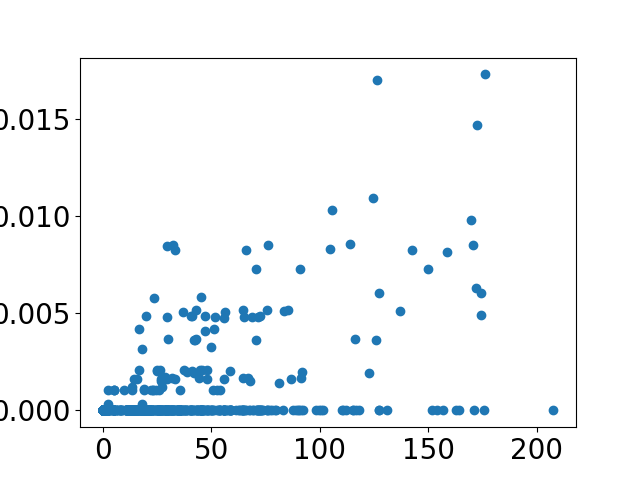

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
select = table_rhos.loc[table_rhos["rho"].notnull()]

ax.scatter(select["prod"], select["an_rate"])

In [52]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2)
select = table_rhos.loc[table_rhos["rho"].notnull()]
variables = np.array((select["n"], select["rho"])).transpose()
poly_variables = poly.fit_transform(variables)

clf = linear_model.LinearRegression()
clf.fit(poly_variables, select["an_rate"])
clf.coef_

LinearRegression()

array([ 0.00000000e+00, -1.64488254e-02, -4.93068983e-08,  1.41759626e-01,
        2.38341948e-05,  2.15770318e-11])

In [57]:
poly_variables.shape

(1584, 6)

In [59]:
import statsmodels.api as sm

est = sm.OLS(np.array(select["an_rate"]).astype(float), poly_variables)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     142.6
Date:                Thu, 30 Dec 2021   Prob (F-statistic):          5.09e-125
Time:                        15:25:29   Log-Likelihood:                 8528.8
No. Observations:                1584   AIC:                        -1.705e+04
Df Residuals:                    1578   BIC:                        -1.701e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.08e-05   3.96e-05      0.525      0.6

In [60]:
est2.pvalues

array([5.99540612e-01, 2.30097203e-07, 7.91998756e-01, 5.21850659e-18,
       1.62874535e-29, 8.22829197e-01])

In [54]:
!pip install statsmodels

     |████████████████████████████████| 9.8 MB 26.6 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 52.5 MB/s eta 0:00:01


In [49]:
poly_variables.shape

(1584, 6)

In [50]:
poly_variables

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       ...,
       [1.00000000e+00, 0.00000000e+00, 1.83966288e+03, 0.00000000e+00,
        0.00000000e+00, 3.38435952e+06],
       [1.00000000e+00, 1.01441027e-02, 1.94377495e+03, 1.02902820e-04,
        1.97178527e+01, 3.77826105e+06],
       [1.00000000e+00, 0.00000000e+00, 1.94443644e+03, 0.00000000e+00,
        0.00000000e+00, 3.78083305e+06]])

In [131]:
for t in range(99):
    hull1 = regular_hulls[0]
    hull2 = regular_hulls[15]

    nodes = [
        node
        for node in exp.nodes
        if node.is_in(t)
        and hull2.contains(Point(node.pos(t)))
        and not hull1.contains(Point(node.pos(t)))
        and np.all(is_in_study_zone(node, t, 1000, 200))
    ]
    tips = [node.label for node in nodes if node.degree(t) == 1]
    table = global_hypha_info.loc[
        global_hypha_info["Plate"] == exp.folders["Plate"].unique()[0]
    ].copy()
    table_time = time_hypha_info.loc[
        time_hypha_info["Plate"] == exp.folders["Plate"].unique()[0]
    ]
    table["max_speed"] = table_time.groupby("end")["speed"].max()
    growing_tips = table_time.loc[
        (table_time["end"].isin(tips)) & (table_time["timestep"] == t)
    ]
    growing_tips = growing_tips.loc[growing_tips["speed"].between(40, 350)]
    consistent_tips = growing_tips.loc[growing_tips["time_since_emergence"] >= 1]
    select_hyphae = table.loc[(table["hypha"].isin(consistent_tips["end"]))]
    anastomosing = select_hyphae.loc[
        (select_hyphae["timestep_anastomosis"] == t)
        & (select_hyphae["tot_length_C"] >= 1000)
    ]
    if len(anastomosing) >= 1:
        print(t, len(anastomosing))

24 1
25 1
27 1
29 2
31 1
32 5
33 2
34 3
36 2
37 2
39 1
40 4
42 1
43 3
44 4
45 2
46 1
47 3
48 4
49 4
50 4
51 1
52 2
53 4
54 3
55 3
56 1
57 2
58 3
59 2
60 2
61 7
62 4
63 7
64 1
65 8
66 1
67 1
68 2
69 2
70 3
71 1
72 1
73 1
74 1
75 2
78 2
80 1
81 1
83 2
84 1
85 2
86 2
88 2
89 1
90 1
91 3
92 1
95 1
96 1


In [132]:
t = 32
hull1 = regular_hulls[0]
hull2 = regular_hulls[15]

nodes = [
    node
    for node in exp.nodes
    if node.is_in(t)
    and hull2.contains(Point(node.pos(t)))
    and not hull1.contains(Point(node.pos(t)))
    and np.all(is_in_study_zone(node, t, 1000, 200))
]
tips = [node.label for node in nodes if node.degree(t) == 1]
table = global_hypha_info.loc[
    global_hypha_info["Plate"] == exp.folders["Plate"].unique()[0]
]
table_time = time_hypha_info.loc[
    time_hypha_info["Plate"] == exp.folders["Plate"].unique()[0]
]
table = table.set_index("hypha")
table["max_speed"] = table_time.groupby("end")["speed"].max()
growing_tips = table_time.loc[
    (table_time["end"].isin(tips)) & (table_time["timestep"] == t)
]
growing_tips = growing_tips.loc[growing_tips["speed"].between(40, 350)]
consistent_tips = growing_tips.loc[growing_tips["time_since_emergence"] >= 1]
select_hyphae = table.loc[(table.index.isin(consistent_tips["end"]))]
anastomosing = select_hyphae.loc[
    (select_hyphae["timestep_anastomosis"] == t)
    & (select_hyphae["tot_length_C"] >= 1000)
]

In [133]:
anastomosing

,av_width_final,tot_length_C,tot_growth_C,Plate,path_exp,folder_analysis,timestep_anastomosis,tot_length_pp,tot_growth_pp,timestep_stop_growth,time_stop_growth,time_init_growth,mean_speed,strop_track,timestep_biological_stop_growth,num_branch,out_of_ROI,max_speed
hypha,,,,,,,,,,,,,,,,,,
1273,9.47451,5645.68,4909.01,792,Analysis_1636052342408187814_0_100_Version9/ex...,Analysis_1636052342408187814_0_100_Version9,32,5433.89,4723.24,33,66.1833,26,119.152,97,None,10,None,243.977302
2070,13.4323,6375.43,6022.34,792,Analysis_1636052342408187814_0_100_Version9/ex...,Analysis_1636052342408187814_0_100_Version9,32,5854.71,5547.31,94,232.033,38,31.2171,99,None,6,None,266.813583
2496,7.56573,2101.64,1762.75,792,Analysis_1636052342408187814_0_100_Version9/ex...,Analysis_1636052342408187814_0_100_Version9,32,1711.33,1544.62,35,70.1667,42,80.4803,99,None,1,None,179.041062
2796,7.60817,4255.51,3735.43,792,Analysis_1636052342408187814_0_100_Version9/ex...,Analysis_1636052342408187814_0_100_Version9,32,4085.7,3589.14,33,66.1833,44,168.739,76,None,4,None,198.000829
4670,12.0904,1406.77,1242.28,792,Analysis_1636052342408187814_0_100_Version9/ex...,Analysis_1636052342408187814_0_100_Version9,32,1373.72,1254.9,33,66.1833,56.1833,107.619,99,None,0,None,168.903494


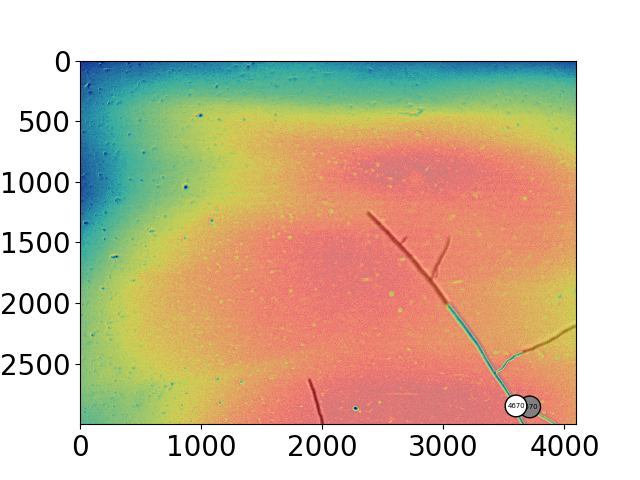

In [138]:
plt.close("all")
Node(4670, exp).show_source_image(t, t + 3)

In [107]:
table_time.loc[(table_time["end"].isin([30867]))]

,end,distance_final_pos,timedelta,time_since_emergence,speed,timestep,timestep_init,time_init,degree,width_tip_edge,...,has_reached_final_pos,in_ROI,time_since_begin_exp,width_root_edge,Plate,folder,t,density_window500,density_window1000,density_window2000
30867,30867,1813.17,1,0,129.352,55,55,55.15,1,9.21626,...,False,True,55.15,NaN,94,Analysis_1636046622780809853_0_100_Version9,55,4271.3,NaN,NaN
30867,30867,1738.48,1,1,185.996,56,55,55.15,1,8.6585,...,False,True,56.15,NaN,94,Analysis_1636046622780809853_0_100_Version9,56,5210.43,NaN,NaN
30867,30867,1630.51,1,2,195.611,57,55,55.15,1,8.32833,...,False,True,57.15,NaN,94,Analysis_1636046622780809853_0_100_Version9,57,5966.38,NaN,NaN
30867,30867,1520.83,1,3,218.029,58,55,55.15,1,8.47012,...,False,True,58.15,NaN,94,Analysis_1636046622780809853_0_100_Version9,58,6135.65,NaN,NaN
30867,30867,1396.47,1,4,196.503,59,55,55.15,1,8.28411,...,False,True,59.15,NaN,94,Analysis_1636046622780809853_0_100_Version9,59,5959.42,NaN,NaN
30867,30867,1303.42,1,5,146.94,60,55,55.15,1,8.36879,...,False,True,60.15,NaN,94,Analysis_1636046622780809853_0_100_Version9,60,6773.33,NaN,NaN
30867,30867,1222.77,1,6,194.525,61,55,55.15,1,8.38302,...,False,True,61.15,NaN,94,Analysis_1636046622780809853_0_100_Version9,61,6977.39,NaN,NaN
30867,30867,1118.19,1,7,176.827,62,55,55.15,1,8.26553,...,False,True,62.15,NaN,94,Analysis_1636046622780809853_0_100_Version9,62,6868.41,NaN,NaN
30867,30867,1022.78,1,8,196.336,63,55,55.15,1,8.37665,...,False,True,63.15,NaN,94,Analysis_1636046622780809853_0_100_Version9,63,8122.9,NaN,NaN
30867,30867,913.119,1,9,178.127,64,55,55.15,1,8.49984,...,False,True,64.15,NaN,94,Analysis_1636046622780809853_0_100_Version9,64,8211.01,NaN,NaN


In [66]:
Node(11155, exp).degree(t + 2)

3

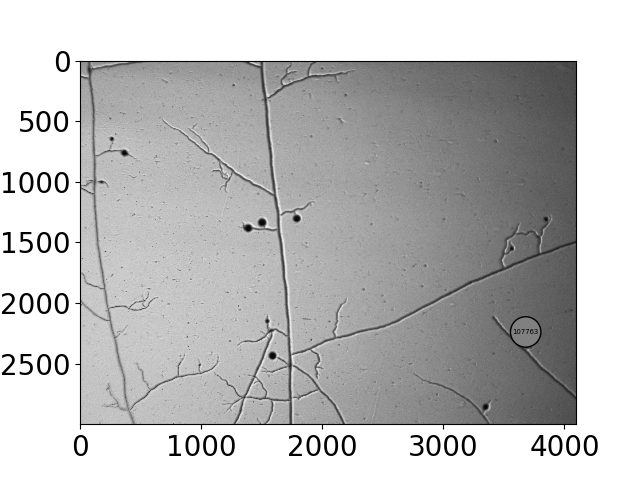

In [55]:
Node(107763, exp).show_source_image(t, t)

In [ ]:
table.loc[table["hypha"].isin(tips)]

In [ ]:
from amftrack.pipeline.functions.post_processing.util import (
    get_length_um_edge,
    is_in_study_zone,
)


def get_num_anastomosis(exp, hull1, hull2, t):
    nodes = [
        node
        for node in exp.nodes
        if node.is_in(t)
        and hull2.contains(Point(node.pos(t)))
        and not hull1.contains(Point(node.pos(t)))
        and np.all(is_in_study_zone(node, t, 1000, 200))
    ]
    tips = [node for node in nodes if node.degree(t) == 1]